In [1]:
import numpy
import tensorflow

2023-10-08 16:10:21.366068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-08 16:10:22.323361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#from tensorflow.keras import utils
import numpy as np
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical
from keras.datasets import mnist
from matplotlib import pyplot as plt


In [4]:
# load dataset
(X_train, Y_train), (test, Y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (test.shape, Y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [5]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)


x_train shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


In [6]:
# Reshape
X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


In [7]:
# Label Encoding 

Y_train = to_categorical(Y_train, num_classes = 10)

In [8]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (54000, 28, 28, 1)
x_test shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_test shape (6000, 10)


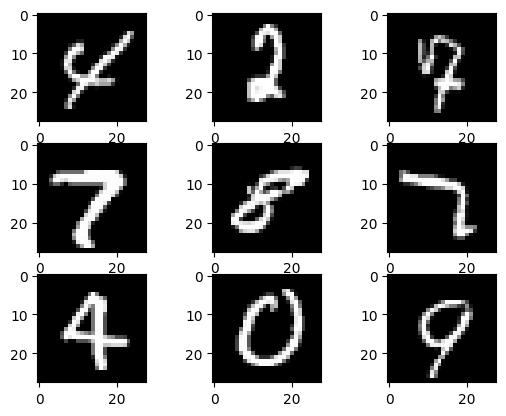

In [12]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 #
# show the figure
plt.show()

In [13]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

2023-10-08 16:17:41.077067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-08 16:17:41.147348: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
model.compile(optimizer = Adam(), loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [17]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [18]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


/tmp/ipykernel_17899/1235084826.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


216/216 [==============================] - 20s 88ms/step - loss: 1.0251 - accuracy: 0.6566 - val_loss: 0.1944 - val_accuracy: 0.9512
Epoch 2/10
216/216 [==============================] - 19s 86ms/step - loss: 0.3777 - accuracy: 0.8813 - val_loss: 0.1033 - val_accuracy: 0.9698
Epoch 3/10
216/216 [==============================] - 19s 86ms/step - loss: 0.2769 - accuracy: 0.9129 - val_loss: 0.0814 - val_accuracy: 0.9763
Epoch 4/10
216/216 [==============================] - 19s 86ms/step - loss: 0.2301 - accuracy: 0.9274 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 5/10
216/216 [==============================] - 19s 87ms/step - loss: 0.2031 - accuracy: 0.9369 - val_loss: 0.0589 - val_accuracy: 0.9815
Epoch 6/10
216/216 [==============================] - 19s 87ms/step - loss: 0.1812 - accuracy: 0.9433 - val_loss: 0.0576 - val_accuracy: 0.9813
Epoch 7/10
216/216 [==============================] - 19s 88ms/step - loss: 0.1692 - accuracy: 0.9482 - val_loss: 0.0503 - val_accuracy: 0.9835
Epo